<a href="https://colab.research.google.com/github/gitaccount-mr/F429741_WSA024_Arduino_Coursework/blob/main/Task_4_Temperature_Optimization_Report_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📘 Task 4: Adaptive Sampling Rate Optimization – Final Report

## 1. Introduction

This project presents the implementation of an intelligent temperature monitoring system on an Arduino platform. The system dynamically adjusts both its sampling rate and power mode based on the frequency and magnitude of temperature fluctuations. The primary goal is to achieve a balance between data accuracy and energy efficiency, using signal processing and predictive analytics techniques.

By collecting real-time data, analyzing it through a Discrete Fourier Transform (DFT), and predicting future behavior using a moving average, the system decides when to remain in Active Mode or transition into lower power modes such as Idle or Power Down.



## 2. System Overview

The system is designed to operate in three power modes:

- **Active Mode:** Frequent sampling to track rapid temperature changes.
- **Idle Mode:** Reduced sampling rate for moderate variations.
- **Power Down Mode:** Minimum energy usage when the environment is stable.

A two-stage decision mechanism uses variation and frequency analysis to switch between modes.



## 3. Arduino Code Overview (C++)

The Arduino sketch includes the following logic:

- **Temperature Reading:** Analog values from a thermistor are converted to Celsius.
- **DFT Analysis:** Finds the dominant frequency to inform sampling decisions.
- **Variation Calculation:** Measures changes between consecutive temperature values.
- **Moving Average:** Tracks the trend of variations to predict future behavior.
- **Power Mode Decisions:** Switches between modes based on predicted variation.
- **Dynamic Sampling Rate:** Ensures sampling respects Nyquist's theorem and energy constraints.

All implementations were optimized for memory and CPU efficiency within Arduino’s limited RAM (2KB).



## 4. Visualizing Temperature Data from CSV
We use a previously collected dataset (3-minute temperature monitoring with 15°C values) to visualize and analyze the system's behavior.


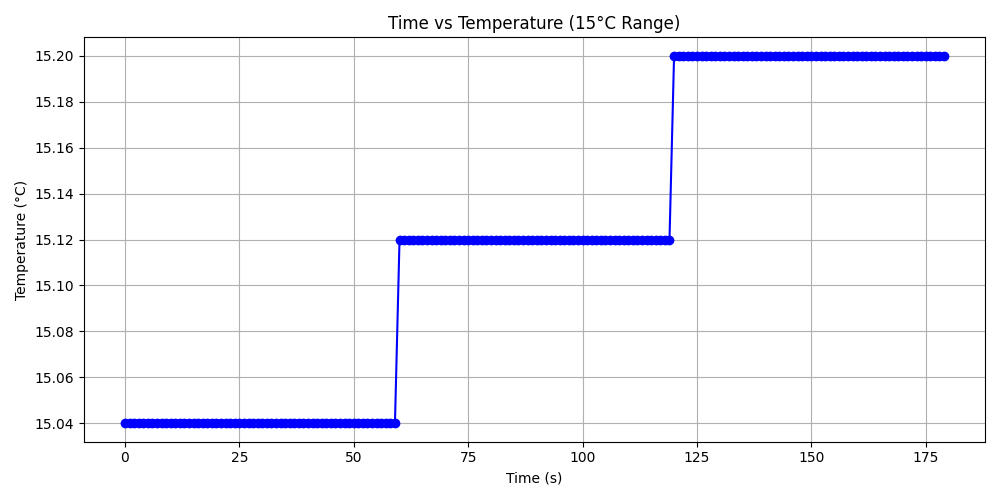

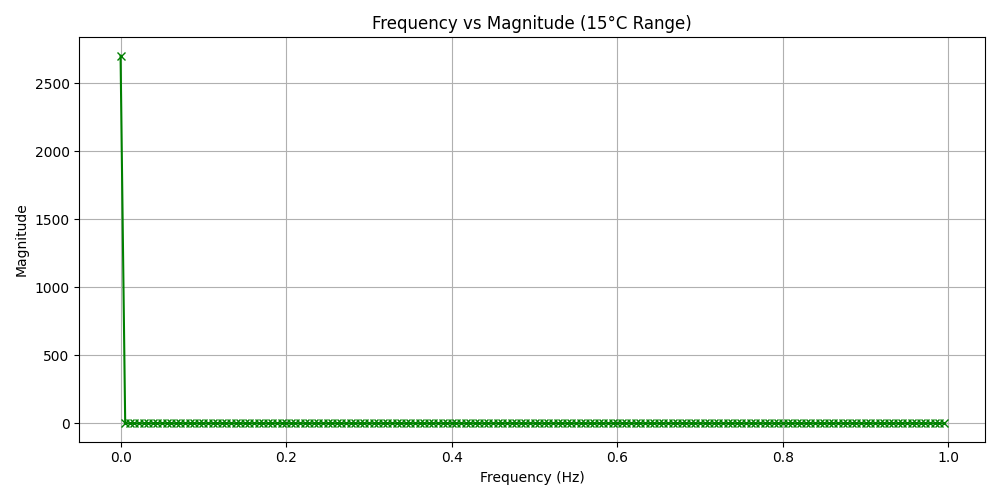

In [4]:
from IPython.display import Image, display

# Display Time vs Temperature Plot
display(Image('time_vs_temperature_15C.png'))

# Display Frequency vs Magnitude Plot
display(Image('frequency_vs_magnitude_15C.png'))


## 5. Code Implementation (Arduino – C++)

Below is the final Arduino sketch used in this project, alongside countless reiterations and explanations all inside a notion page.


[Check out the full project notes on Notion](https://grizzly-pixie-3fd.notion.site/Arduino-Coursework-1d2cace33b5d805c8415e2b88f543ff5?pvs=4)


## 6. Explanation of Adaptive Control

Each cycle lasts 60 seconds, after which the system evaluates:

- **Predicted variation**: Computed with a 10-cycle moving average.
- **Dominant frequency**: Extracted via DFT.
- **Power mode**: Switches between ACTIVE, IDLE, or POWER_DOWN.
- **Sampling rate**: Ensures compliance with Nyquist's theorem using `dominantFreq * 2`.

This allows for responsive and energy-efficient operation.



## 7. Memory Efficiency Considerations

The following strategies were used to manage memory effectively:

- **Static Array Allocation**: Arrays (`temperatureData[]`, `variationHistory[]`) were fixed-size and bounded.
- **Window-based Averaging**: The moving average only stores the last 10 cycles (float values), using ~40 bytes.
- **Avoiding Dynamic Memory Allocation**: No use of `new`/`malloc` ensures no heap fragmentation.
- **In-Place Computations**: All calculations like DFT, variation, and averaging are done without creating temporary arrays.

Together, these ensure operation within the ATmega328P’s 2KB SRAM constraint.



## 8. Conclusion

The project successfully achieved an intelligent, adaptive temperature monitoring system that balances precision and efficiency. The use of real-time signal analysis, predictive modeling, and dynamic power management creates a system that is well-suited for embedded environments where energy and memory are critical.

